In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
pwd

'/home/akash/Desktop/MMM_ADKR'

# 1. Import the dataset

In [4]:
df = pd.read_csv('acme_bank_data_v2.csv')

# 2. Take a look at the dataset, what would be some of the first checks you would do?

Will check for:

    data-types
    Missing values
    Counts of both classes
    Basic info about data: Ranges, scales, total categories

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   29872 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   29954 non-null  float64
 13  BILL_AMT2                   299

In [7]:
#changing name of 'default payment next month' to 'default'

df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default']


In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,29872.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,29996.000000,29994.000000,29996.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167410.607927,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.566242,40314.996866,38868.813475,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129721.364116,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64336.673193,60802.116583,59555.613569,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2324.500000,1763.250000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19051.000000,18104.500000,17068.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50208.500000,49177.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# 3. In the dataset, are there any missing values? How will you treat them?
Hint : Think about imputation versus dropping the values

There are several missing values in the data as shown below.

There are no missing values in categorical data.

Missing values can be tackled in several ways.

- Can be dropped straight away but it may lead to information loss.

- Can be imputed using different methods:

    - Mean, median imputation for continuous data, mode imputation for categorical
    
Here, we'll be imputing with the **median of the respective class(default/no-default)* as observed later that due to presence of outliers mean is on the higher side.**   
     
    

In [9]:
df.isnull().sum()

ID             0
LIMIT_BAL    128
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1     46
BILL_AMT2     12
BILL_AMT3     16
BILL_AMT4      4
BILL_AMT5      6
BILL_AMT6      4
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default        0
dtype: int64

In [10]:
##Finding numerical columns(other than discrete, categorical)

num_vars = []
for i in df.columns:
    if df[i].nunique()>56 :  ##Since 56 is the no. of highest discrete values found in 'AGE' 
        num_vars.append(i)
        
        
num_vars.remove('ID')   #As ID is just for unique identification     
        
cat_vars = [col for col in df.columns if col not in num_vars+['ID','AGE']]        

In [11]:
def missing_val_imputation(df):

    for i in num_vars:

        median_when_default = df[(df[i].isna()==False) & (df['default']==1)][i].median()
        median_when_no_default = df[(df[i].isna()==False) & (df['default']==0)][i].median()

        df[i] = np.where((df[i].isna()==True) & (df['default']==1),median_when_default,df[i])
        df[i] = np.where((df[i].isna()==True) & (df['default']==0),median_when_no_default,df[i])
        
    return df  

In [12]:
df = missing_val_imputation(df)

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

##### Missing values have been imputed 

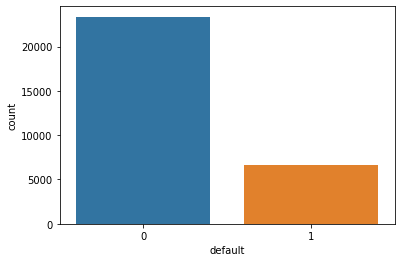

In [69]:
sns.countplot(data=df,x='default');

In [15]:
df['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

#### Data is highly imbalanced. 


# What about outliers, which methods can be used to check for outliers. What should be done with these outliers?

**Outliers can be checked using:**
    
    - Boxplots: Points below and above 1.5*IQR can be treated as outliers.
    
    - Using percentiles: Several percentiles can be found first. 
        Based on that, can check if high difference between the percentiles at higher and lower side    
        
    - Using standard deviations(Data beyond 2-3 SD can be considered as outlier)
    
    
    
   **Treatment of Outliers**
   
   - On considering 1.5*IQR as filter to detect outliers, almost 11000 points(out of 30000 points) fell into the category which is a huge number. 
    
   - I tried 2.5*IQR, outliers came about 8000 points.
   - **Hence considered points beyong +2.5*IQR as outliers**
    
    Dropping of this high number is not a good idea. Hence, this needs to be imputed. 
    
 
 **Ways of dealing with it:**
    
    - Drop the outliers: Will lead to Information loss
    - Replace outliers with highest/lowest percentiles considered to be non-outlier: e.g. if 99.5+ percentile is is being considered as outlier, all such points  can be replaced by say 99 percentiles
    - Can use k-NN imputer (try different nearest neighbours values): 3 NN taken here.
    
    

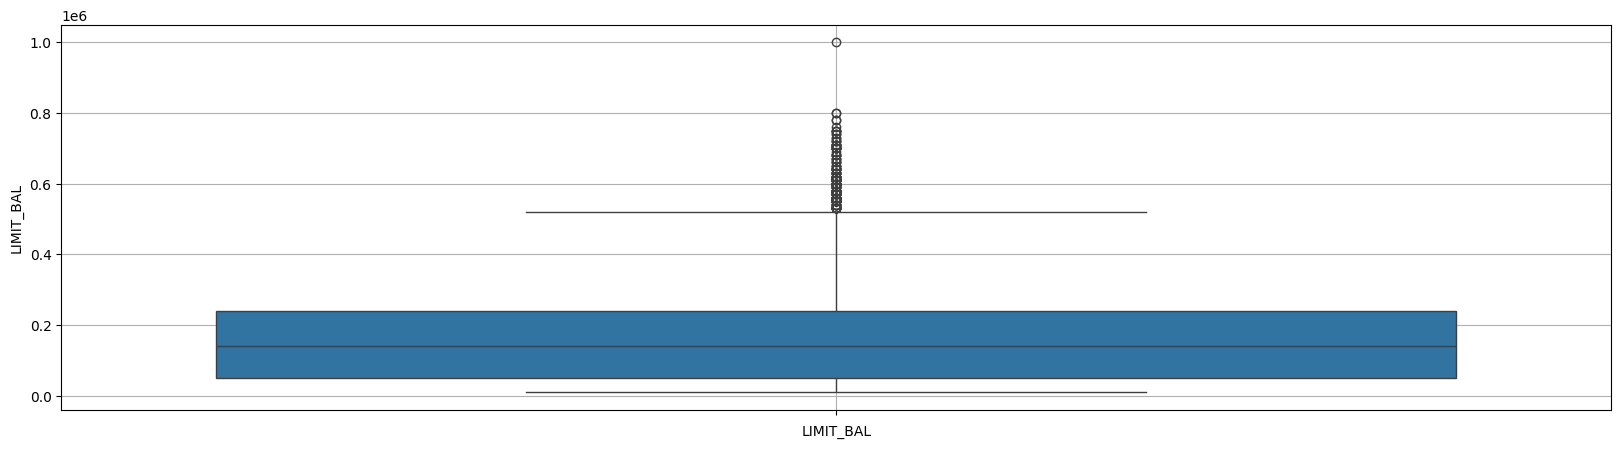

Percentile  0.5:  10000.0
Percentile  1:  10000.0
Percentile  5:  20000.0
Percentile  25:  50000.0
Percentile  50:  140000.0
Percentile  90:  360000.0
Percentile  95:  430000.0
Percentile  99:  500000.0
Percentile  99.5:  540000.0
Percentile  100:  1000000.0


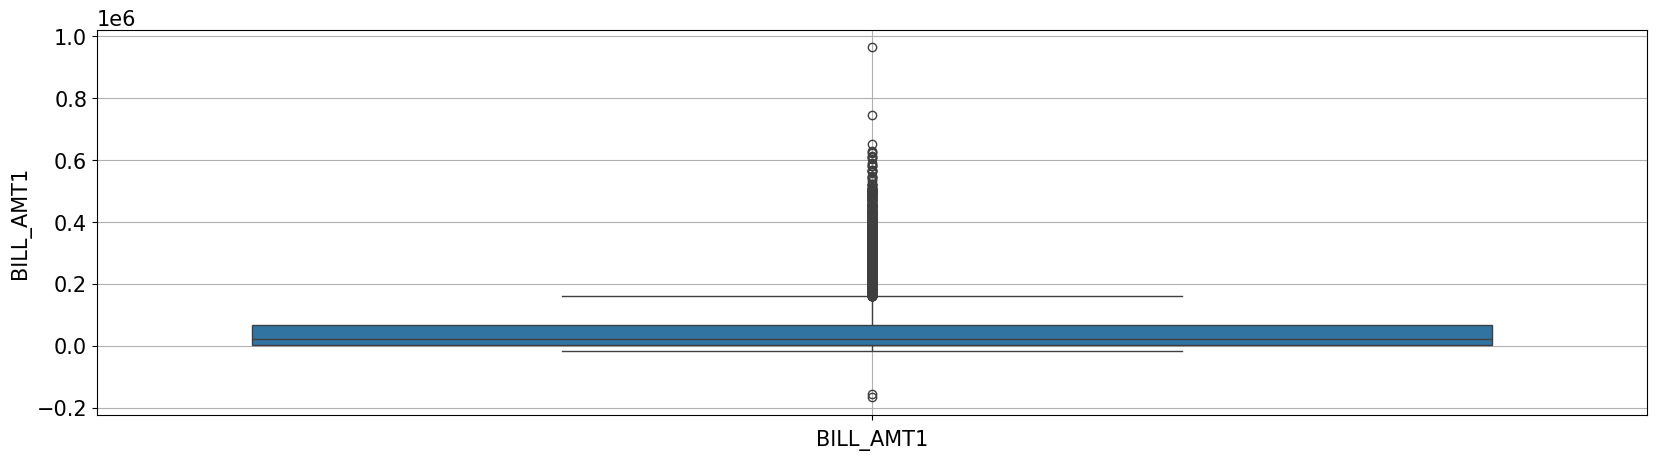

Percentile  0.5:  -397.015
Percentile  1:  -81.0
Percentile  5:  0.0
Percentile  25:  3577.0
Percentile  50:  22422.5
Percentile  90:  142090.10000000006
Percentile  95:  201170.64999999997
Percentile  99:  349134.8499999984
Percentile  99.5:  413085.73000000196
Percentile  100:  964511.0


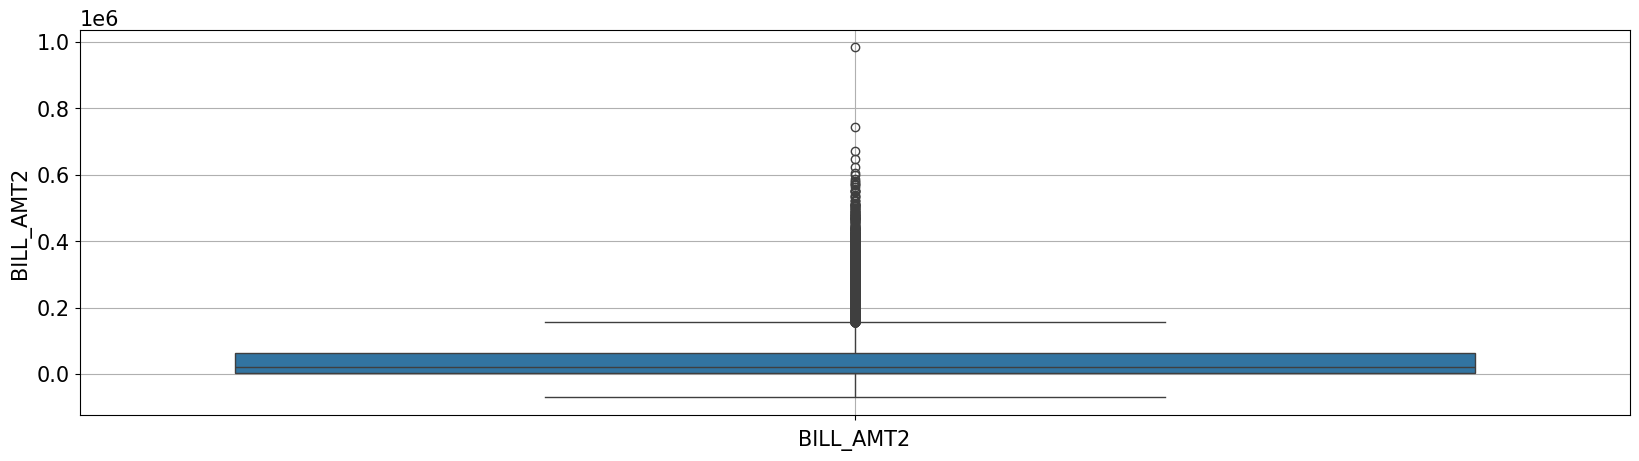

Percentile  0.5:  -720.005
Percentile  1:  -200.0
Percentile  5:  0.0
Percentile  25:  2986.0
Percentile  50:  21200.0
Percentile  90:  136888.1
Percentile  95:  194736.89999999997
Percentile  99:  337274.22999999963
Percentile  99.5:  397465.4500000003
Percentile  100:  983931.0


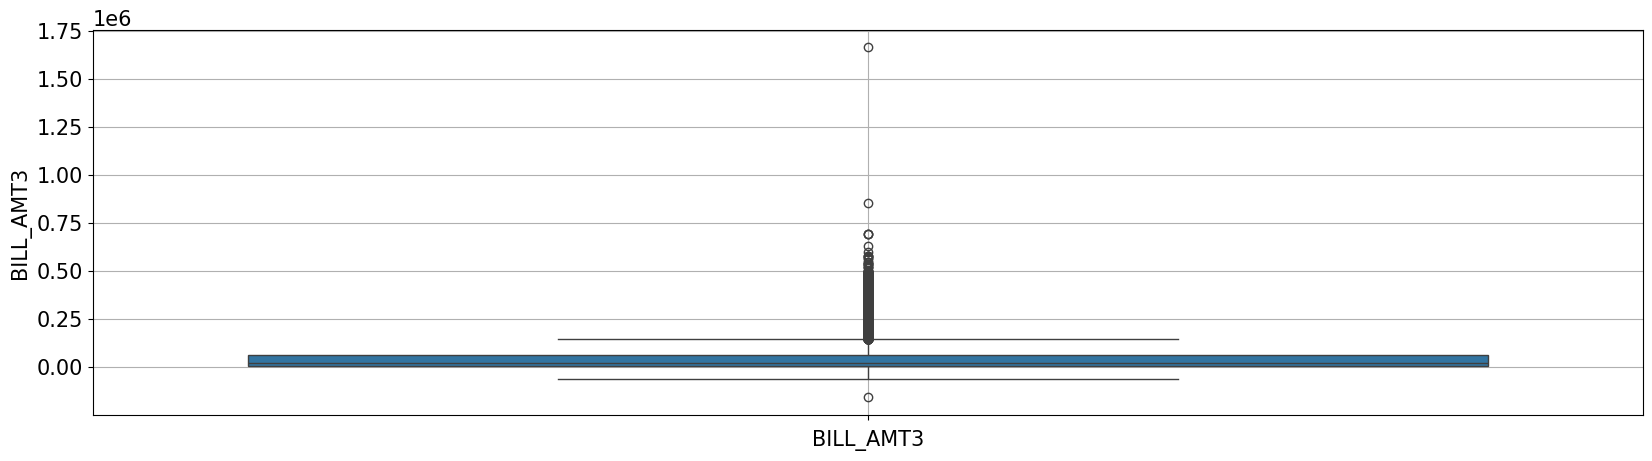

Percentile  0.5:  -890.035
Percentile  1:  -200.0
Percentile  5:  0.0
Percentile  25:  2676.75
Percentile  50:  20098.5
Percentile  90:  132006.20000000004
Percentile  95:  187821.05
Percentile  99:  325030.38999999897
Percentile  99.5:  389695.0450000002
Percentile  100:  1664089.0


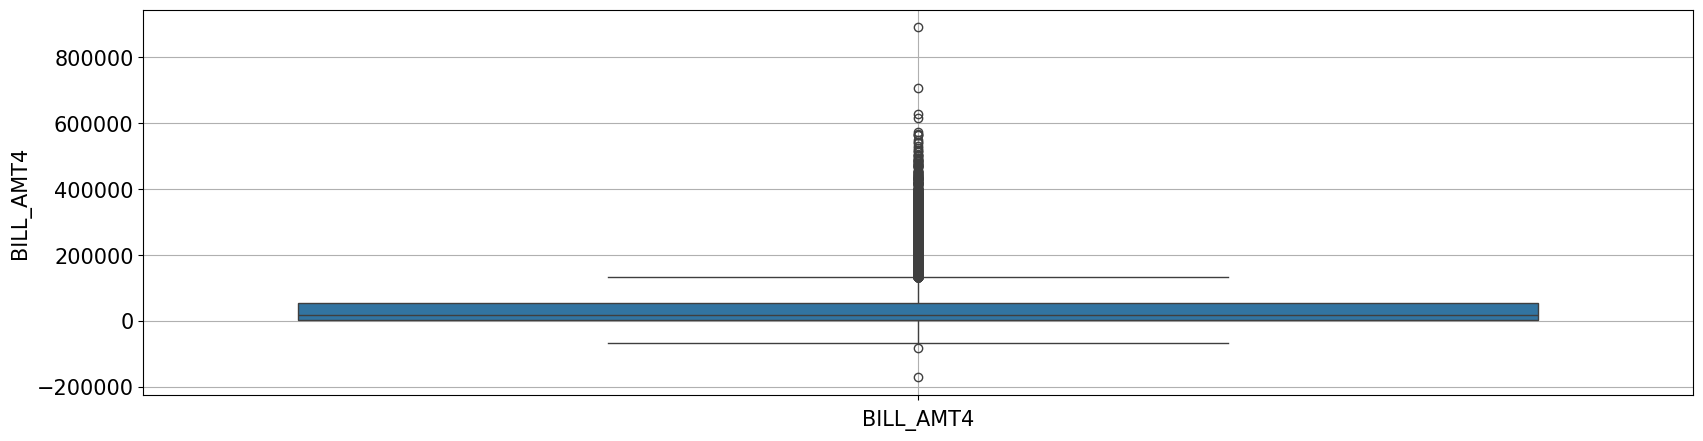

Percentile  0.5:  -1000.005
Percentile  1:  -212.01999999999998
Percentile  5:  0.0
Percentile  25:  2326.75
Percentile  50:  19051.0
Percentile  90:  122418.70000000006
Percentile  95:  174333.34999999995
Percentile  99:  304997.26999999996
Percentile  99.5:  362192.1050000002
Percentile  100:  891586.0


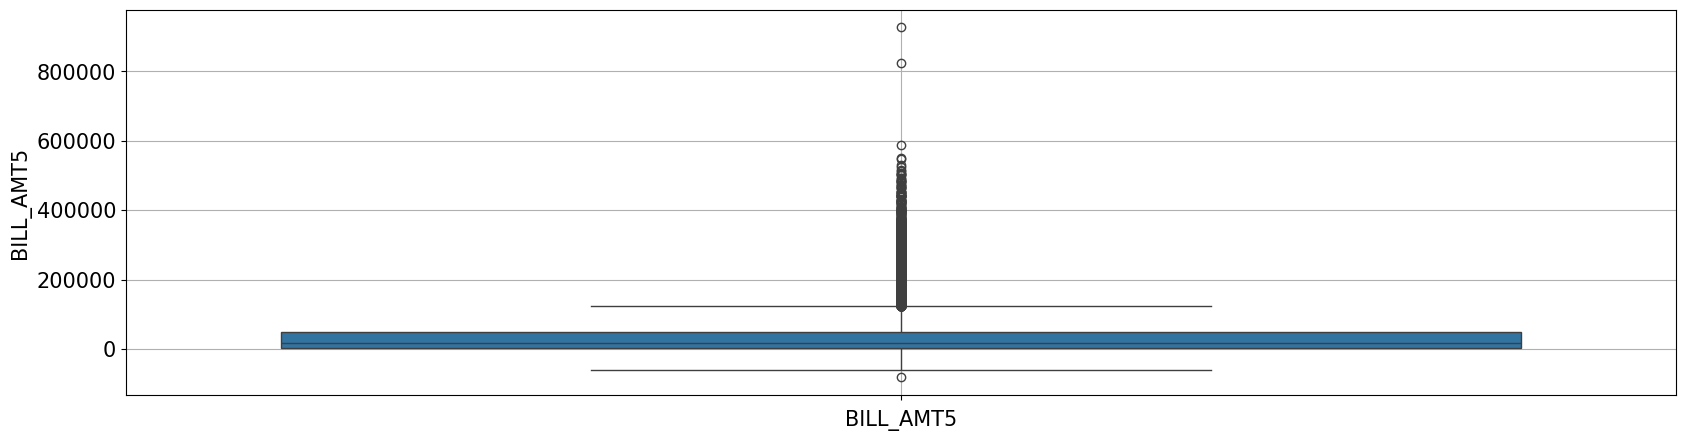

Percentile  0.5:  -1169.0749999999998
Percentile  1:  -232.01
Percentile  5:  0.0
Percentile  25:  1764.75
Percentile  50:  18102.5
Percentile  90:  115883.00000000003
Percentile  95:  165794.3
Percentile  99:  285868.32999999996
Percentile  99.5:  338990.05000000185
Percentile  100:  927171.0


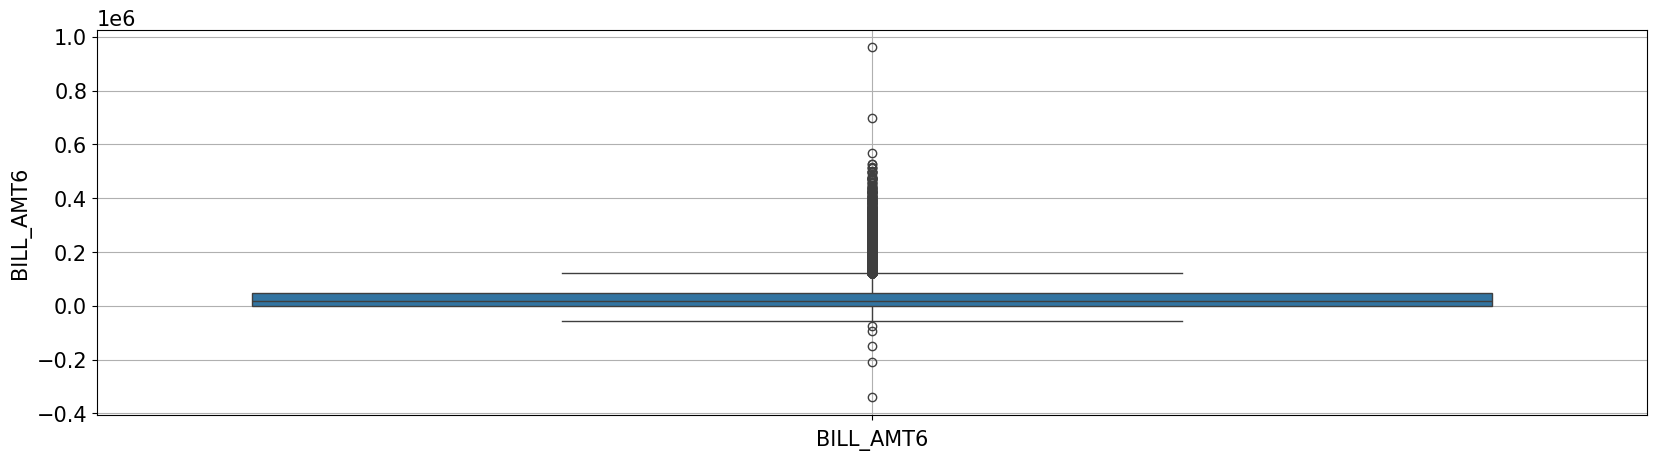

Percentile  0.5:  -1450.045
Percentile  1:  -331.03
Percentile  5:  0.0
Percentile  25:  1256.0
Percentile  50:  17067.5
Percentile  90:  112096.20000000003
Percentile  95:  161912.0
Percentile  99:  279505.05999999965
Percentile  99.5:  329948.86500000017
Percentile  100:  961664.0


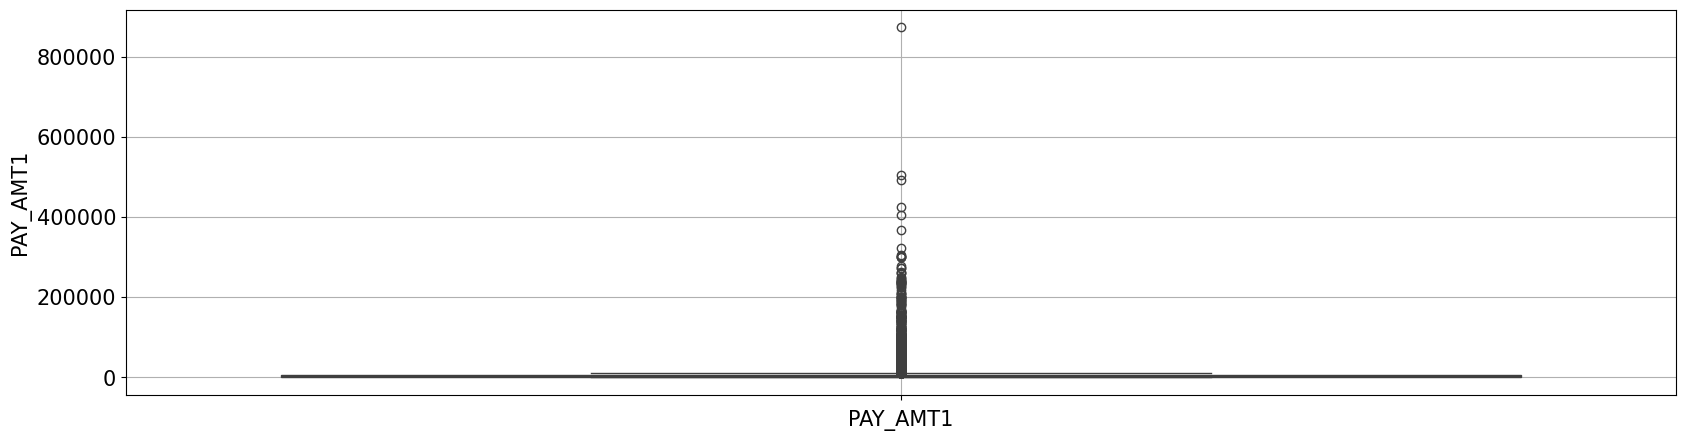

Percentile  0.5:  0.0
Percentile  1:  0.0
Percentile  5:  0.0
Percentile  25:  1000.0
Percentile  50:  2100.0
Percentile  90:  10300.0
Percentile  95:  18428.199999999997
Percentile  99:  66522.17999999854
Percentile  99.5:  100000.0
Percentile  100:  873552.0


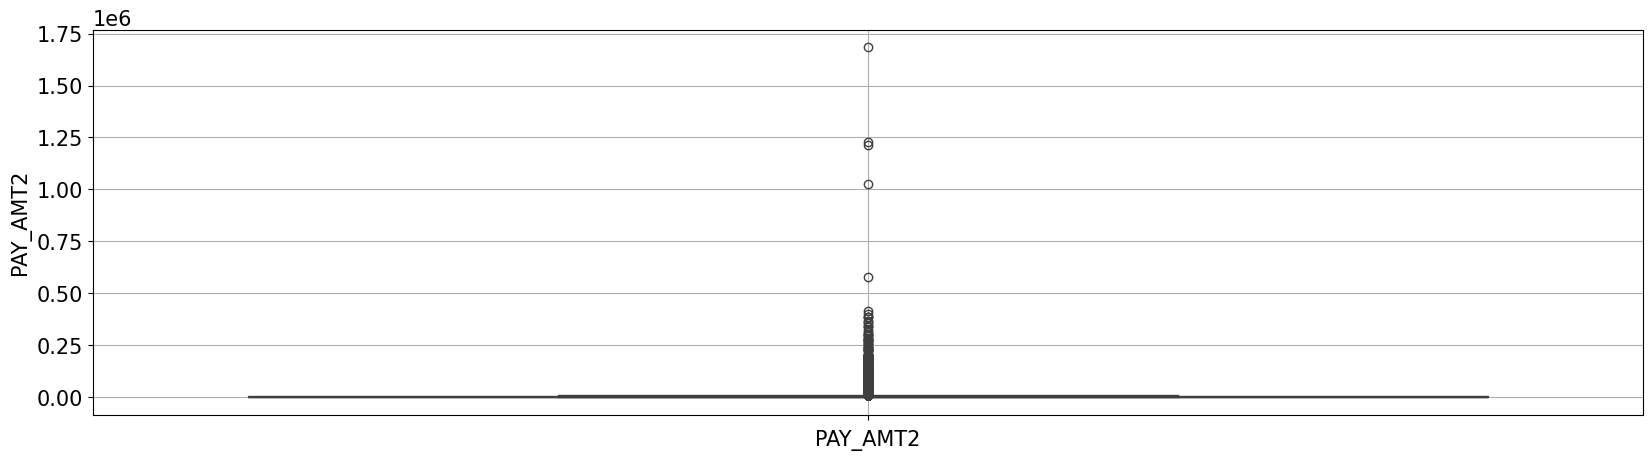

Percentile  0.5:  0.0
Percentile  1:  0.0
Percentile  5:  0.0
Percentile  25:  833.0
Percentile  50:  2009.0
Percentile  90:  10401.100000000024
Percentile  95:  19004.34999999998
Percentile  99:  76651.01999999999
Percentile  99.5:  120000.09000000003
Percentile  100:  1684259.0


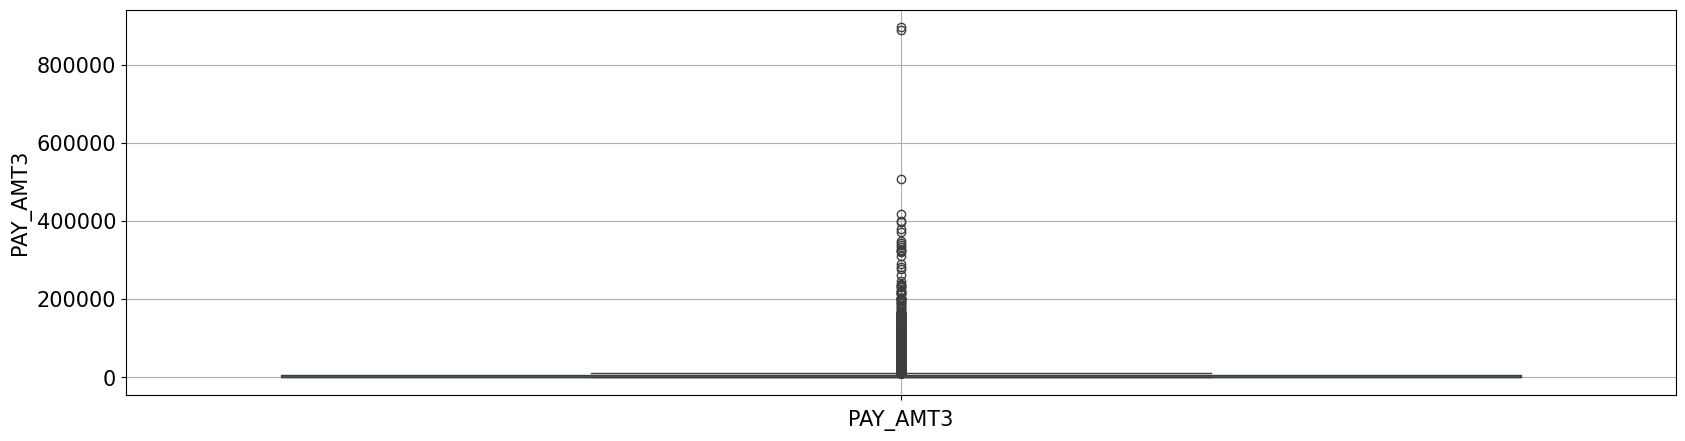

Percentile  0.5:  0.0
Percentile  1:  0.0
Percentile  5:  0.0
Percentile  25:  390.0
Percentile  50:  1800.0
Percentile  90:  10000.0
Percentile  95:  17589.399999999994
Percentile  99:  70000.0
Percentile  99.5:  109471.28000000026
Percentile  100:  896040.0


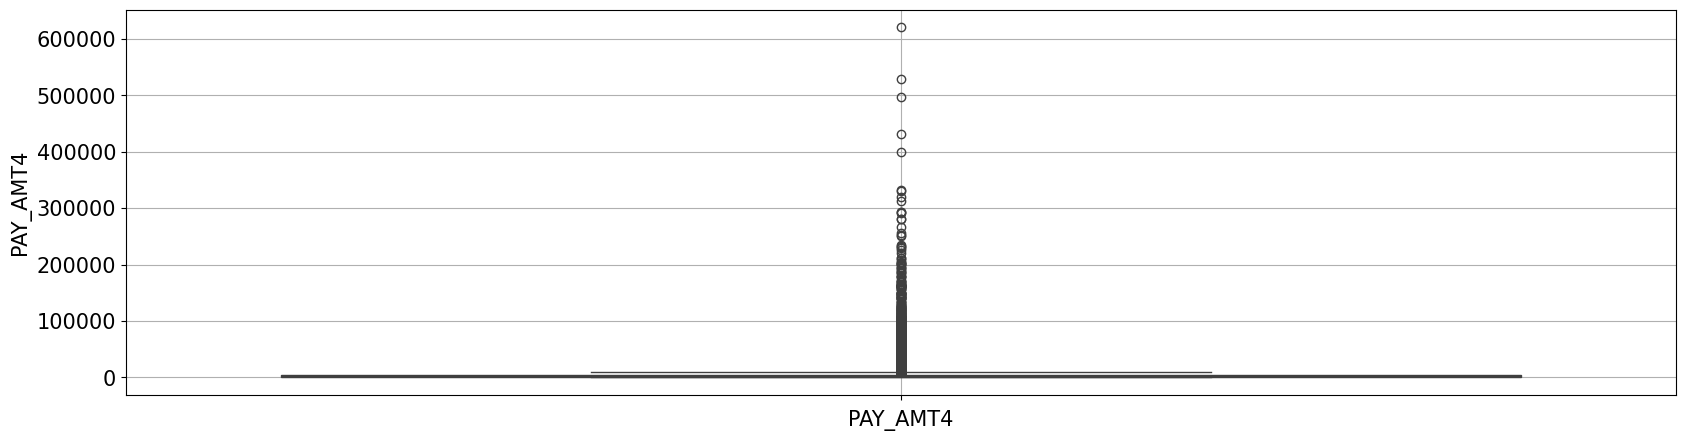

Percentile  0.5:  0.0
Percentile  1:  0.0
Percentile  5:  0.0
Percentile  25:  296.0
Percentile  50:  1500.0
Percentile  90:  9570.600000000013
Percentile  95:  16014.949999999986
Percentile  99:  67054.43999999961
Percentile  99.5:  100000.0
Percentile  100:  621000.0


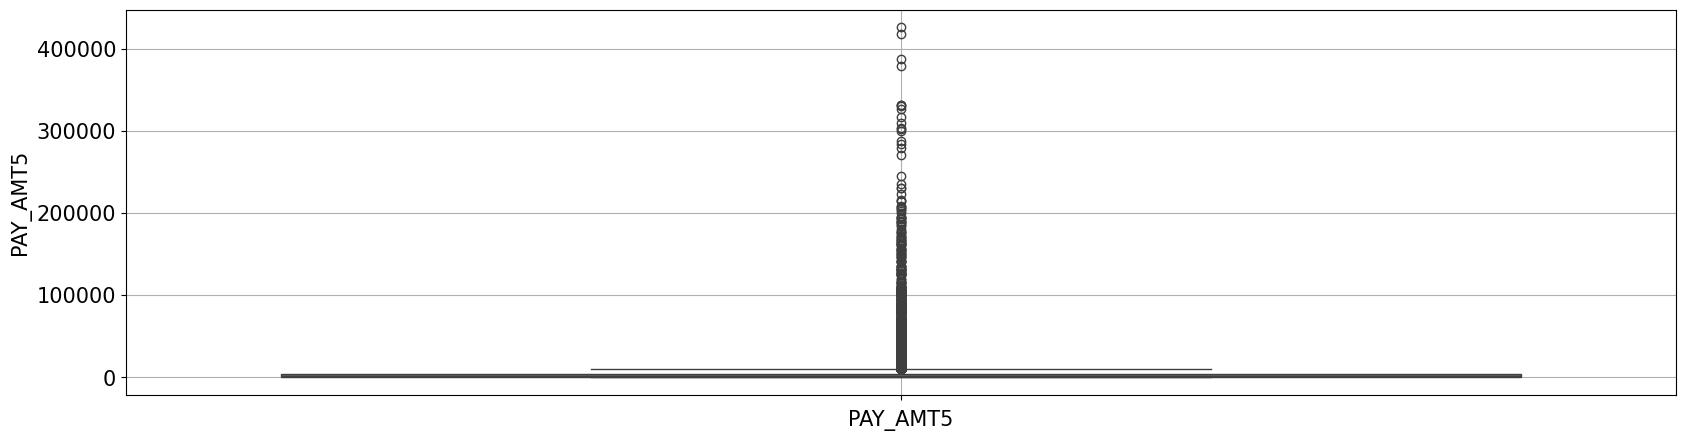

Percentile  0.5:  0.0
Percentile  1:  0.0
Percentile  5:  0.0
Percentile  25:  252.5
Percentile  50:  1500.0
Percentile  90:  9500.0
Percentile  95:  16000.0
Percentile  99:  65607.55999999991
Percentile  99.5:  100049.23000000004
Percentile  100:  426529.0


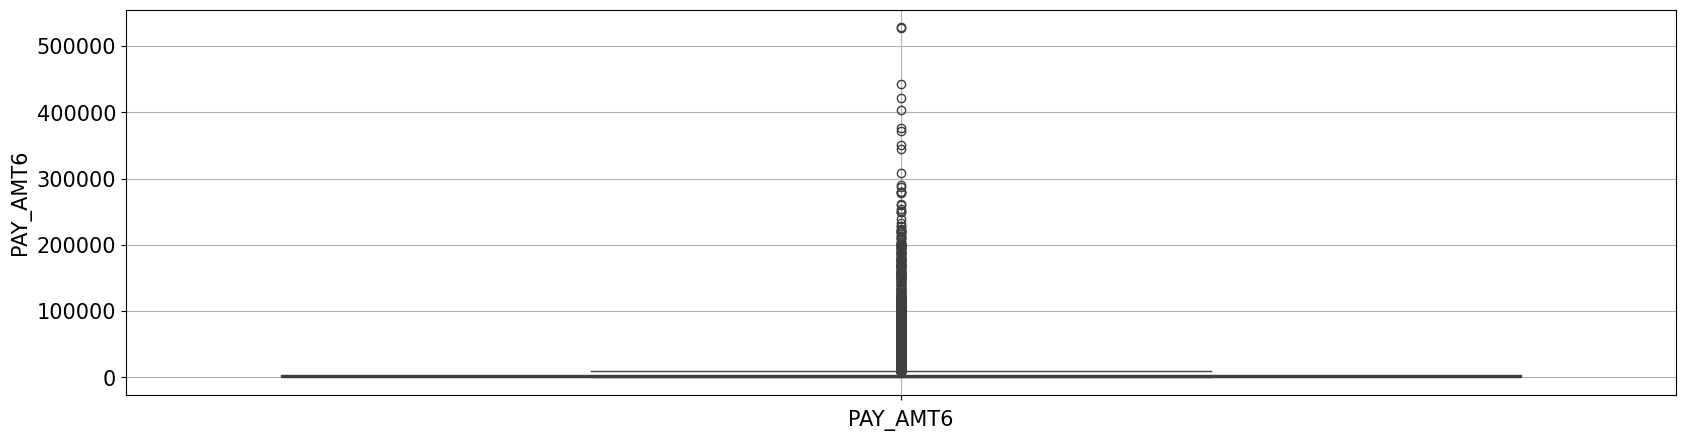

Percentile  0.5:  0.0
Percentile  1:  0.0
Percentile  5:  0.0
Percentile  25:  117.75
Percentile  50:  1500.0
Percentile  90:  9600.0
Percentile  95:  17343.799999999974
Percentile  99:  82619.04999999935
Percentile  99.5:  125027.21500000147
Percentile  100:  528666.0


In [16]:
for i in num_vars:
    p = sns.boxplot(df[i])
    plt.gcf().set_size_inches(20, 5)
    plt.xticks(fontsize = 15)
    plt.rc('font', size=15)
    p.set_xlabel(i)
    plt.grid()

    plt.show()
    
    print('Percentile  0.5: ',np.percentile(df[i],0.5))
    print('Percentile  1: ',np.percentile(df[i],1))
    print('Percentile  5: ',np.percentile(df[i],5))
    print('Percentile  25: ',np.percentile(df[i],25))
    print('Percentile  50: ',np.percentile(df[i],50))
    print('Percentile  90: ',np.percentile(df[i],90))
    print('Percentile  95: ',np.percentile(df[i],95))
    print('Percentile  99: ',np.percentile(df[i],99))
    print('Percentile  99.5: ',np.percentile(df[i],99.5))
    print('Percentile  100: ',df[i].max())

In [ ]:
# # for i in cat_vars:
# #             plt.figure(i)
# #             sns.countplot(data=df[cat_vars],x='default',hue=i)

# for col in cat_vars:
#     plt.figure(figsize=(10,5))
#     sns.countplot(x = col, hue = 'default', data = df)

## It seems that PAY_0 (Repayment status in September) and PAY_2 (Repayment status in August) have more discriminatory power the repayment status in other months.

In [ ]:
# sns.barplot(x='index',y='AGE',data=df_copy,orient='v')

In [ ]:
df[df['LIMIT_BAL'].isna()!=False]

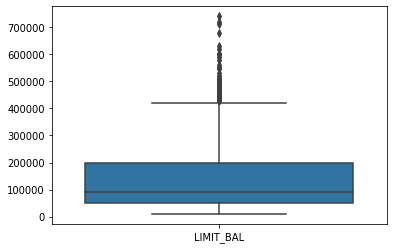

In [18]:
sns.boxplot(data = df[(df['LIMIT_BAL'].isna()==False) & (df['default']==1)][['LIMIT_BAL']]);

When there is default, we can observe many outliers in LIMIT_BAL.
Hence, for imputation of LIMIT_BAL, will use median of LIMIT_BAL when default happened.(default=1) 

In [13]:
  
def remove_outliers(df,limit):
    data = df[num_vars].copy()
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75-q25

    mask = (data < (q25 - limit*iqr)) | (data > (q75 + limit*iqr)) # set the cap
    data[mask] = np.nan # set the cap from the dataframe
    #data = data.dropna()
    return data



In [82]:
num_vars

['LIMIT_BAL',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [81]:
outlier_imputer_dict = {}

def prepare_outlier_dict(df):
    
    for var in df.columns:
    
        percentile_dict = {}

        NinetyNine_percentile = np.percentile(df[var],99)  

        First_percentile = np.percentile(df[var],1)

        percentile_dict['99th'] =  NinetyNine_percentile
        percentile_dict['1st'] =  First_percentile  
        # Saving as dictionary for each column
        outlier_imputer_dict[var] = percentile_dict
        np.save('outlier_imputer_dict',outlier_imputer_dict)

#Saving the final dictionary         
# np.save('outlier_imputer_dict',outlier_imputer_dict)    


In [103]:
prepare_outlier_dict(X_train[num_vars])

In [104]:
def outlier_imputer(df):
    #Loading Outlier Imputer dictionary
    outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()
    
    for var in df.columns:
        
        df.loc[df[df[var] > outlier_dict[var]['99th']].index,var] = outlier_dict[var]['99th']  
       
        df.loc[df[df[var] < outlier_dict[var]['1st']].index,var] = outlier_dict[var]['1st']
    
    return df

    print(outlier_imputer_dict)

#Applying imputation on Train & Test 
X_train[num_vars] = outlier_imputer(X_train[num_vars])
X_test[num_vars] = outlier_imputer(X_test[num_vars])

In [87]:
X_train

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4762,30000.0,26846.0,27718.00,28067.0,28334.0,28984.0,14769.0,2000.0,1500.0,1000.00,800.0,728.0,1000.0
26106,450000.0,0.0,557.00,0.0,2481.0,13716.0,19584.0,557.0,0.0,2481.00,13716.0,7100.0,812.0
16205,80000.0,3482.0,2946.00,1524.0,2946.0,1473.0,0.0,1000.0,1524.0,1473.00,1473.0,0.0,390.0
26722,180000.0,189.0,-167.06,-200.0,126884.0,129020.0,131708.0,0.0,0.0,68454.87,4209.0,4350.0,4099.0
12398,400000.0,77970.0,70557.00,71867.0,72137.0,72955.0,76467.0,0.0,3200.0,2750.00,3000.0,5800.0,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,240000.0,30589.0,2225.00,3708.0,20694.0,19771.0,38603.0,2239.0,3700.0,20739.00,10003.0,40115.0,8756.0
17728,50000.0,44664.0,48028.00,46985.0,50484.0,50404.0,50241.0,4110.0,0.0,4600.00,1000.0,2000.0,0.0
29199,10000.0,9457.0,9554.00,7335.0,9025.0,7886.0,8382.0,1107.0,1310.0,2000.00,269.0,1000.0,1100.0
7293,100000.0,390.0,1780.00,0.0,0.0,0.0,0.0,4780.0,0.0,0.00,0.0,0.0,0.0


In [14]:
#https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction
#https://github.com/andrewnguyen07/credit-default-detector/blob/main/jupyter%20notebooks/default_detector_traditional-ml.ipynb
#https://towardsdatascience.com/credit-risk-management-eda-feature-engineering-81cc34efc428



In [91]:
# df_num_vars = remove_outliers(df[num_vars],limit=1.5)

In [94]:
df_num_vars = df[num_vars]

In [70]:
df_num_vars.isna().sum()

LIMIT_BAL    0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [72]:
df_num_vars.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [95]:
df_copy = df.copy()

# Outlier Imputation using knn-Imputer

**Before imputation, will merge some categories by referring the data dictionary then will standardize the whole data together**

**As category '5', '6' both in Education are unknown as per data dictionary, hence can be merged. Also, '0' category is not mentioned in data dictionary, hence being merged with '5'(unknown)**


**As marriage doen't have '0' as per data dictionary, hence merging with '3'**  

In [96]:
df['MARRIAGE'] = np.where(df['MARRIAGE']==0,3,df['MARRIAGE'])
df['EDUCATION'] = np.where(((df['EDUCATION']==6) | (df['EDUCATION']==0)),5,df['EDUCATION'])

#### One hot encoding of categorical variables

In [97]:
df_cat_dummies = pd.get_dummies(df[cat_vars],columns = cat_vars, drop_first=True)

In [98]:
df_new = pd.concat([df[['ID','default','AGE']],df_cat_dummies,df_num_vars],axis=1)

In [99]:
df_new.isnull().sum()

ID             0
default        0
AGE            0
SEX_2          0
EDUCATION_2    0
              ..
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
Length: 82, dtype: int64

Will first standardize the data to fit kNN imputer to fix the outliers

Before standardizing, will divide data into train and test to prevent any data leakage

WIll fit the scaler on train and transform both Train and Test using that

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler        
    
    
X_cols = list(df_new.columns)
X_cols.remove('default')
X_cols.remove('ID')

#Preparing X & y
y = df_new['default']
X = df_new[X_cols]

#Train test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

#Using Standard scaler for standardization
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [101]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=3)
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.fit_transform(X_test)

# X_train = scaler.inverse_transform(X_train)
# X_test = scaler.inverse_transform(X_test)

#Converting to dataframe
X_train = pd.DataFrame(X_train,columns = X_cols)
X_test = pd.DataFrame(X_test,columns = X_cols)

In [102]:
X_train.shape

(24000, 80)

# 5. Looking at the dataset, can you suggest any new features/variables which can be created to help in predicting default? Make at least 3 new features to be used for the model.

Bill amounts for different periods can be summed to make a new column named 'Total Bill'

Similarly, 'Total Paid' column can be made by adding Paid amounts

'Dues left' column for indicating the dues left

Impact of these 3 columns may not be much as these are just addition/subtraction of other already present columns.
(In case we use all columns for prediction)

In [105]:
X_train['Total_Bill'] = X_train[['BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

X_train['Total_Paid'] = X_train[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

X_train['Dues_left'] = X_train['Total_Bill']-X_train['Total_Paid']

In [106]:
X_test['Total_Bill'] = X_test[['BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

X_test['Total_Paid'] = X_test[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

X_test['Dues_left'] = X_test['Total_Bill']-X_test['Total_Paid']

In [107]:

#Saving in csv format
X_test.to_csv('X_test4_outlierRemovedPercentileStrategy.csv')
X_train.to_csv('X_train4_outlierRemovedPercentileStrategy.csv')

In [150]:
X_test=pd.read_csv('X_test2.csv')
X_train = pd.read_csv('X_train2.csv')

In [108]:
X_test_copy = X_test.copy()
X_train_copy = X_train.copy()

In [109]:
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)

In [110]:
y_test_copy = y_test.copy()
y_train_copy = y_train.copy()

In [111]:
X_train.shape,y_train.shape

((24000, 83), (24000,))

# 6.Now after completing basic data treatment and feature engineering, you start thinking aboutprediction of default. Before diving into algorithm building, are there any visual/graphical methods you can use to analyze the relationship of default with other variables in the dataset.

# 7. Based on this, are there any key variables which emerge for prediction of default?

.

## >>Demonstrating relationship with Default graphically

## With continuous vars

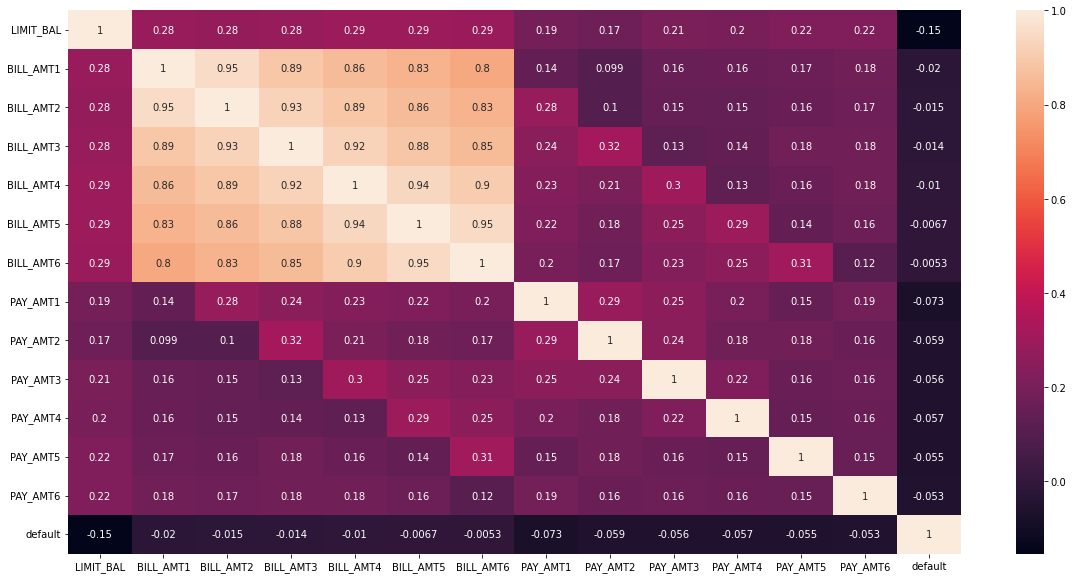

In [23]:
# Plot Correlation with Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df[num_vars+['default']].corr(),annot=True)
plt.show()

In [112]:
correl_matrix = df_new[num_vars+['default']].corr()
correl_matrix

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.283686,0.276350,0.281866,0.292596,0.294837,0.289610,0.191616,0.174996,0.207344,0.201587,0.216552,0.218583,-0.153783
BILL_AMT1,0.283686,1.000000,0.951325,0.891094,0.859268,0.829016,0.801609,0.140326,0.099331,0.156786,0.158378,0.166150,0.179337,-0.020048
BILL_AMT2,0.276350,0.951325,1.000000,0.927181,0.891530,0.859090,0.830705,0.280474,0.100853,0.150543,0.147449,0.157955,0.174376,-0.014672
BILL_AMT3,0.281866,0.891094,0.927181,1.000000,0.923696,0.883622,0.852931,0.244187,0.316373,0.129967,0.143463,0.179715,0.182136,-0.014070
BILL_AMT4,0.292596,0.859268,0.891530,0.923696,1.000000,0.940111,0.900849,0.233031,0.207562,0.300035,0.130200,0.160441,0.177647,-0.010187
BILL_AMT5,0.294837,0.829016,0.859090,0.883622,0.940111,1.000000,0.946119,0.217037,0.181210,0.252308,0.293121,0.141578,0.164189,-0.006723
BILL_AMT6,0.289610,0.801609,0.830705,0.852931,0.900849,0.946119,1.000000,0.199973,0.172657,0.233790,0.250251,0.307729,0.115511,-0.005334
PAY_AMT1,0.191616,0.140326,0.280474,0.244187,0.233031,0.217037,0.199973,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929
PAY_AMT2,0.174996,0.099331,0.100853,0.316373,0.207562,0.181210,0.172657,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.058579
PAY_AMT3,0.207344,0.156786,0.150543,0.129967,0.300035,0.252308,0.233790,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740,-0.056250


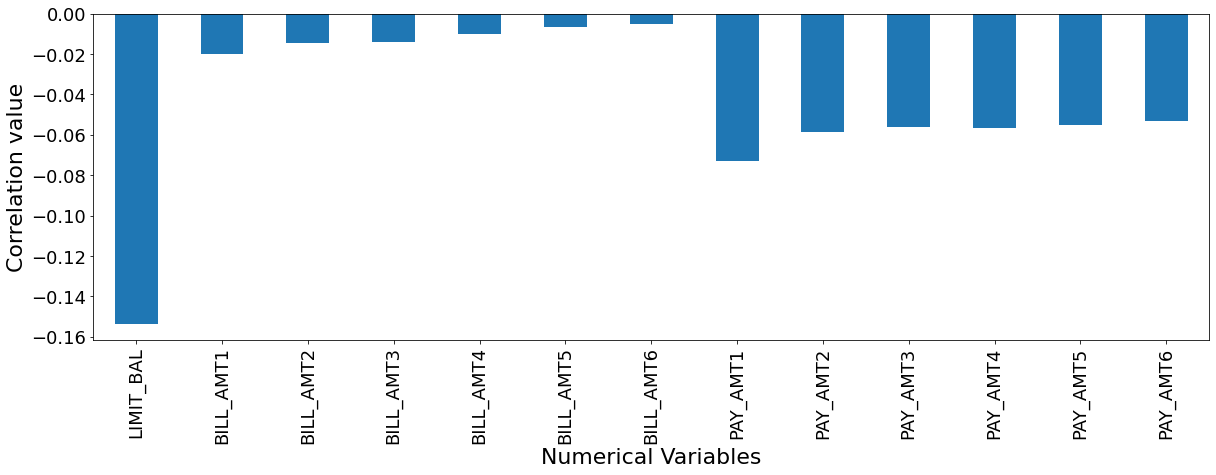

In [40]:
plt.figure(figsize=(20,6))
p = correl_matrix.loc['default',list(correl_matrix.columns[:-1])].plot(kind='bar')
p.set_xlabel('Numerical Variables', fontsize = 22)
p.set_ylabel('Correlation value', fontsize = 22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### **Observations: (Continuous + Discrete vars) vs Default**



    - All numerical vars have negative correlation with the default var 
    
    -  LIMIT_BAL(Credit given) has highest negative correlation with default variable. Indicating more high the    credit given, more high is the chance to default
      Also, there is clear distinction between default & non-default medians(refer below boxplots) 

    - Correlation of Pay amount is in order of latest to oldest month(highets in Sept,2005 to lowest in April,         2005)
    - None of the variables has very strong correlation with the Default
    
    - AGE column doesn't seem to be much impactful for classification(refer boxplots below) as distribution looks similar for both Default & No-default


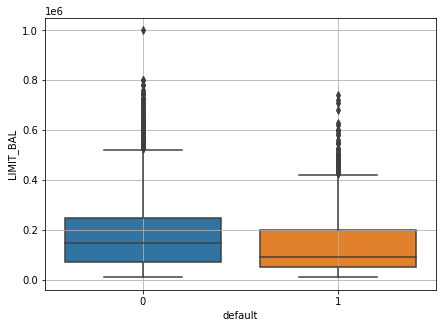

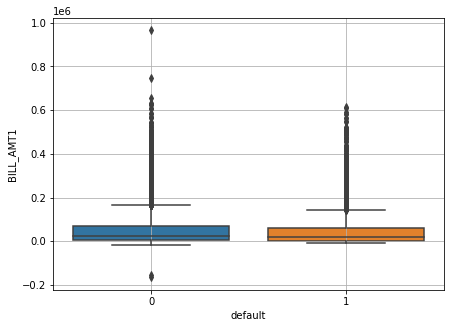

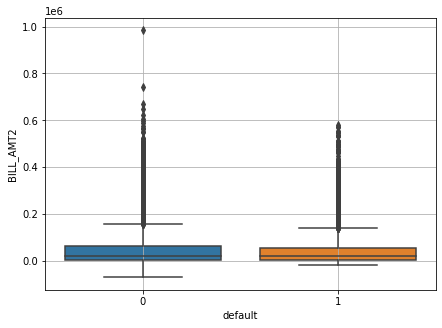

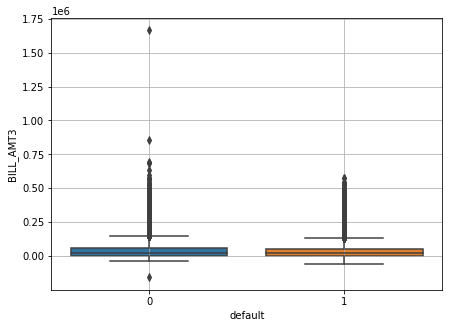

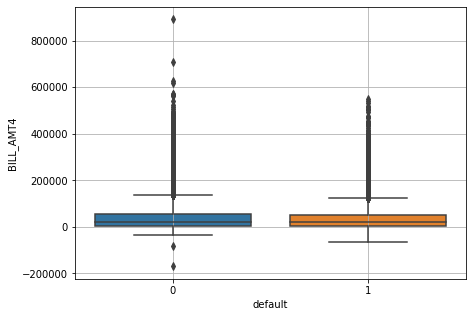

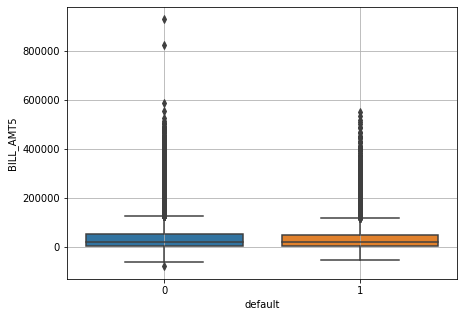

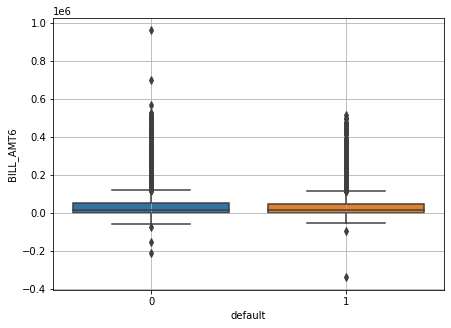

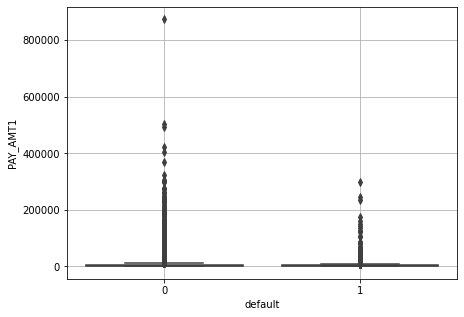

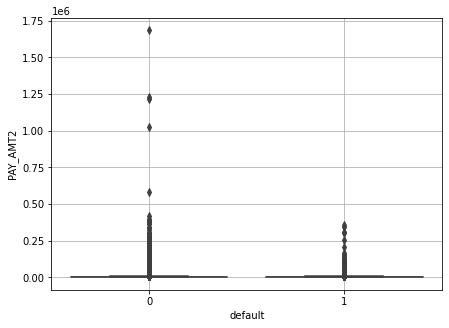

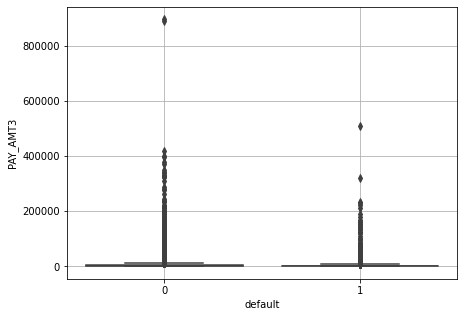

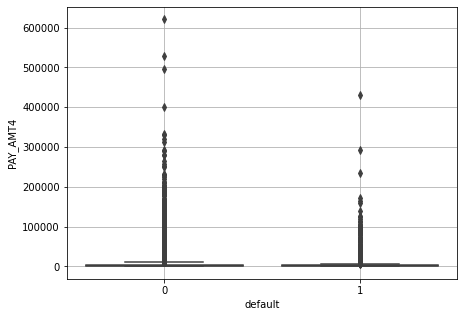

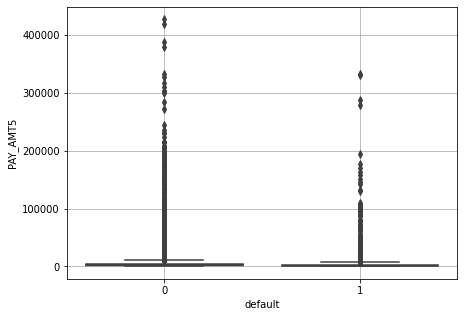

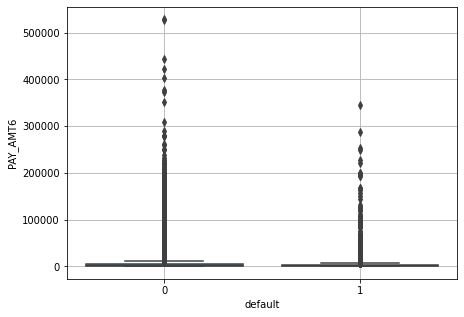

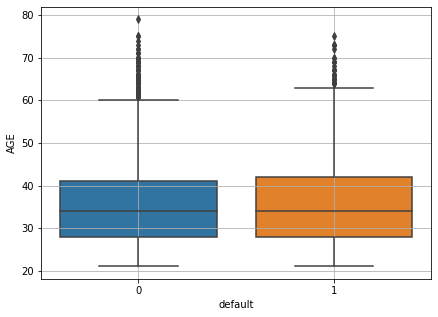

In [50]:
for i in num_vars+['AGE']:
    sns.boxplot(x=df['default'],y=df[i])#, hue='default'
    plt.gcf().set_size_inches(7, 5)
    plt.grid()
    plt.show()

### With categorical vars

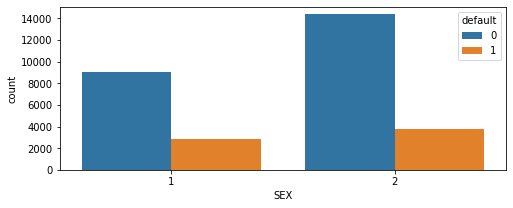

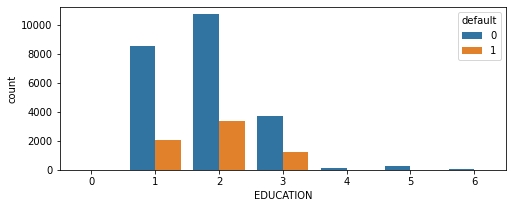

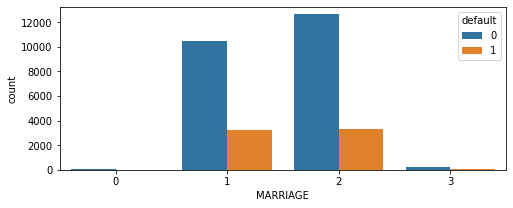

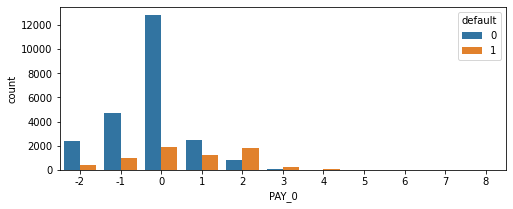

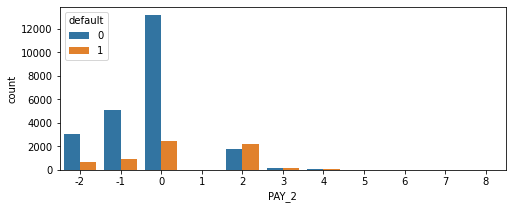

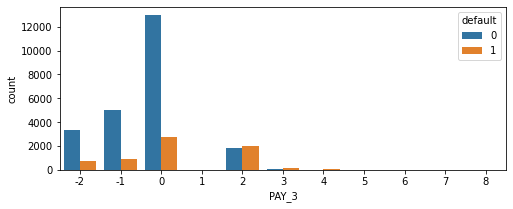

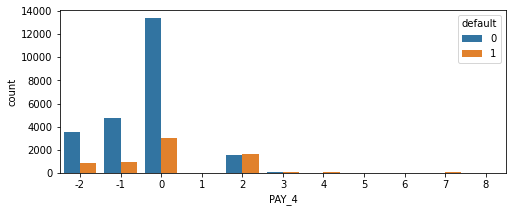

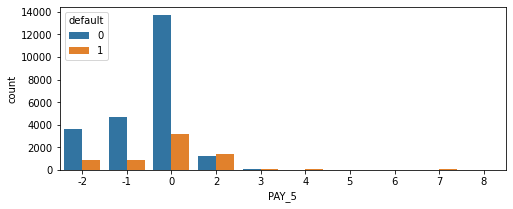

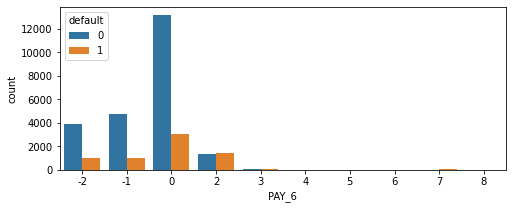

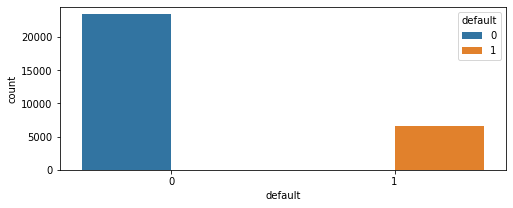

In [45]:
for col in cat_vars:
    plt.figure(figsize=(8,3))
    sns.countplot(x = col, hue = 'default', data = df)

### **Observations: Categorical vars vs Default**

- Count of category '0' is highest in all Repayment status variables(Pay 0, Pay 1...Pay 6) 
for both default and non-default. Though the meaning of category 0 is not clear as per data dictionary

- Ratio of Count of category '0' with respect to non-default and default is 
highest in all Repayment status variables(Pay 0, Pay 1...Pay 6)

- Count of Categories 3,4,5,6,7,8 in all Repayment status variables is negligible

- Ratio of count of Defaulting to No-defaulting people is much less in Female compared to men

- Ratio of count of Defaulting to No-defaulting people is highest among Graduate School students compared to 
university and high school

- Marital status seems not to be much impactful for classification  

# 8. Which algorithms can you use to predict default?

 Several algorithms like Logistic regression, Decision Trees classifier, Random Forest classifier, Naive Bayes, XGBoost, GBDT, etc can be used for classification

# 9. Let's set up a basic logistic regression model. Should we use all the variables while making the model? Why or why not?

Selection of variables is important if the no. of variables is high in the dataset as this may make the model complex and lead to overfitting.

Variables which may not be useful for classifying can be dropped beforehand.

Several techniques can be used to reduce the no. of features:

   - **Recursive feature elimination:** Can start from all variables and can fit the model while reducing the un-important variables
    
   - **Forward selection:** One by one variables can be added into the model after checking if model performace improves or not
    
   - **L1 regularization:** This helps in feature selection as un-important variables' coefficients are reduced to zero while optimization    
    
   - **PCA:** Dimensions can be found where the maximum variance is projected and hence complexity can be reduced
        
**Our approach: Will start with whole data and will let L1, L2 regularization run**

In [113]:
#Using Standard scaler for standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE

In [131]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

Data is highly Imbalanced. Presence of Default records is much less than No-defaults. 

Algorithms like Logistic regression are highly impacted due to imbalance. Hence, need to balance this before modelling.

Ways to handle imbalance:

    - Up-sampling of minor class
    
    - Down-sampling of major class
    
    - New points creation using SMOTE  
    
    
Here I will be using SMOTE to handle imbalance    

In [114]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [40]:
X_train.shape, y_train.shape

((37362, 83), (37362,))

In [44]:
X_train.columns

Index(['AGE', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8', 'default_1', 'LIMIT_BAL', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'P

In [118]:

# #Converting to dataframe and then saving 

# X_train = pd.DataFrame(X_train,columns = X_train_cols)
# X_test = pd.DataFrame(X_test,columns = X_test_cols)
# y_train = pd.DataFrame(y_train,columns = ['default'])
# y_test = pd.DataFrame(y_test,columns = ['default'])
# X_train = X_train.drop(['Unnamed: 0','default_1'],axis=1)
# X_test = X_test.drop(['Unnamed: 0','default_1'],axis=1)

df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

In [119]:
df_train.to_csv('df_train_Final_data_outlierRemovedPercentileStrategy__for_modelling_24.12.2022.csv')
df_test.to_csv('df_test_Final_data_outlierRemovedPercentileStrategy_for_modelling_24.12.2022.csv')

In [47]:
df_train.default.value_counts()

1    18681
0    18681
Name: default, dtype: int64

#### The data is balanced now. Will proceed with modelling. 

# Model Building

## Recursive feature selection

In [120]:
X_train.drop('default_1',axis=1,inplace=True)
X_test.drop('default_1',axis=1,inplace=True)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [121]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
rfecv = RFECV(estimator= model, step = 1, cv = 5, scoring="accuracy")
rfecv = rfecv.fit(X_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X_train.columns[rfecv.support_])

The optimal number of features: 71
Best features: Index(['AGE', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_6', 'PAY_3_7',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_6', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Total_Bill', 'Total_Paid', 'Dues_left'],
      dtype='object')


In [122]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [123]:
"""Evaluate Model using cross validation of KFolds"""

scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)

## Evaluating Performace Metrics

cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
F1_score = np.round(f1_score(y_test,y_pred),3)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
CV_score = np.mean(scores)
roc = roc_auc_score(y_test, y_pred) 

In [124]:
##with outlier treatment-Percentile strategy
print("\nAccuracy Score on Test : {}\n".format(np.round(accuracy_score(y_test,y_pred),3)))
print("F1 Score : {}\n".format(np.round(f1_score(y_test,y_pred),3)))
print("K- fold validation Mean Accuracy: {} ".format(np.mean(scores)))

    


Accuracy Score on Test : 0.774

F1 Score : 0.539

K- fold validation Mean Accuracy: 0.7786666666666665 


In [125]:
##without outlier treatment
print("\nAccuracy Score on Test : {}\n".format(np.round(accuracy_score(y_test,y_pred),3)))
print("F1 Score : {}\n".format(np.round(f1_score(y_test,y_pred),3)))
print("K- fold validation Mean Accuracy: {} ".format(np.mean(scores)))

    


Accuracy Score on Test : 0.774

F1 Score : 0.539

K- fold validation Mean Accuracy: 0.7786666666666665 


In [179]:
##Before oversampling
print("\nAccuracy Score on Test : {}\n".format(np.round(accuracy_score(y_test,y_pred),3)))
print("F1 Score : {}\n".format(np.round(f1_score(y_test,y_pred),3)))
print("K- fold validation Mean Accuracy: {} ".format(np.mean(scores)))

    


Accuracy Score on Test : 0.778

F1 Score : 0.547

K- fold validation Mean Accuracy: nan 


In [126]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [127]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1,verbose=3,cv = 10)
grid_lr.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED 

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [128]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [129]:
grid_lr.best_score_

0.7078850650850141

In [130]:
final_lr = grid_lr.best_estimator_

In [131]:
# Predicted Probability
train_preds = final_lr.predict_proba(X_train)
test_preds = final_lr.predict_proba(X_test)

In [132]:
# Get the predicted classes
train_class_preds = final_lr.predict(X_train)
test_class_preds = final_lr.predict(X_test)

# 14. How will you measure the performance of the model?

Performance of Classification models can be checked using several metrics.
- Confusion matrix, Precision, Recall
- Accuracy
- AUC
- Log loss

In cases like Credit default classification, Accuracy metric can be a bit misleading. 

Here, we want our model to be predicting well the default classes. 

As predicting a defaulter as a non-defaulter would be much worse than 
predicting a non-defaulter as a defaulter. 

Hence, most important metric here would be Recall/TPR. Also, F1 score & Precision are also important here.

In [134]:
#Without outlier removal-percentile strategy
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)


The accuracy on train data is  0.7088485627107757
The accuracy on test data is  0.7736666666666666


In [63]:
#Without outlier removal
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)


The accuracy on train data is  0.7037096515175847
The accuracy on test data is  0.7768333333333334


In [188]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)


The accuracy on train data is  0.7065735239012901
The accuracy on test data is  0.7783333333333333


In [199]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision/TPR on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7783333333333333
The precision/TPR on test data is  0.6097190584662111
The recall on test data is  0.49598517603458925
The f1 on test data is  0.5470027247956404
The roc_score on test data is  0.6893301821738799


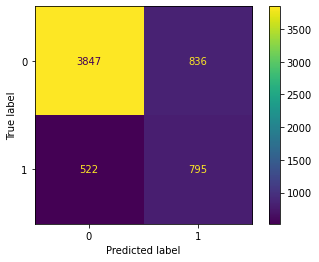

In [135]:
plot_confusion_matrix(model,X_test,y_test);

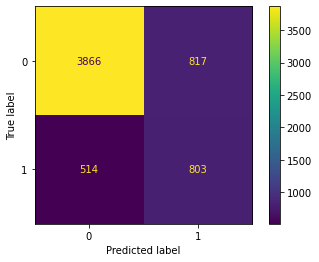

In [190]:
plot_confusion_matrix(model,X_test,y_test);

In [200]:
feature_importance = pd.DataFrame({'Features':X_train.columns, 'Importance':np.abs(final_lr.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:20]

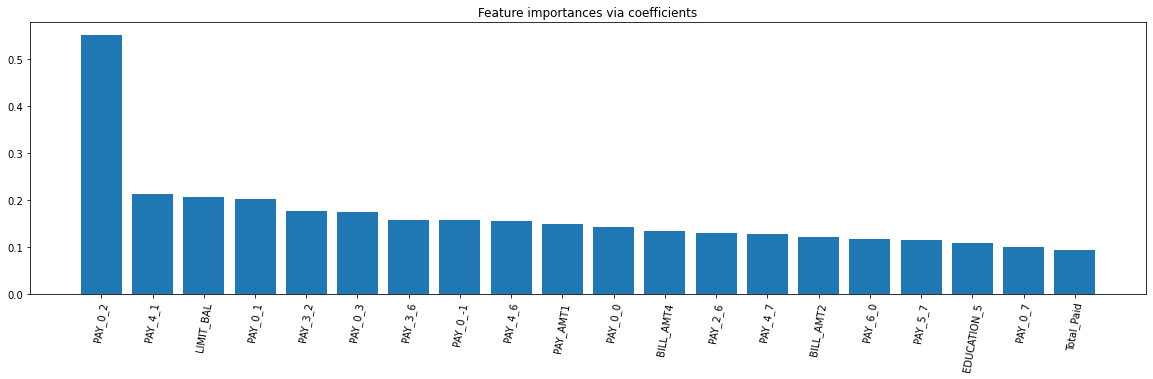

In [201]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.gcf().set_size_inches(20, 5)
plt.show()

# 12. What is the most predictive variable?

Repayment status in September is the most predictive feature 

# Fitting Tree Based models

In [206]:
X2 = pd.concat([X_train,X_test],axis=0)
y2 = pd.concat([y_train,y_test],axis=0)


In [ ]:
pip install xgboost

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [215]:
models = []
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for i in range(len(models)):
    
    lst_2 = []
    model = models[i][1].fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    """Evaluate Model using cross validation of KFolds"""
    
    scores = cross_val_score(model, X2, y2, scoring='accuracy', cv=10)
    
    ## Evaluating Performace Metrics
    
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    F1_score = np.round(f1_score(y_test,y_pred),3)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    CV_score = np.mean(scores)
    auc = roc_auc_score(y_test, y_pred) 
    
    
#     ## Appending in the list
#     lst_2.append(models[i][0])
#     lst_2.append((accuracy_score(y_test, y_pred))*100) 
#     lst_2.append(scores.mean()*100)
#     lst_2.append(scores.std()*100)
#     lst_2.append(roc)
#     lst_2.append(precision)
#     lst_2.append(recall)
#     lst_2.append(F1_score)
#     lst_1.append(lst_2)
    
    print("--------------------------------------------{}------------------------------\n\n".format(models[i][0]))
    print(cm)
    print("\nAccuracy Score on Test : {}\n".format(np.round(accuracy_score(y_test,y_pred),3)))
    print("F1 Score : {}\n".format(np.round(f1_score(y_test,y_pred),3)))
    print("K- fold validation Mean Accuracy: {}  :" .format(np.mean(scores)))
    print("Recall/True Positive Rate: {}".format(np.round(recall,2)))
    print("Precision: {}".format(np.round(precision,2)))
    print("ROC-AUC: {}".format(np.round(auc,2)))

--------------------------------------------Decision Tree------------------------------


[[3543 1140]
 [ 674  643]]

Accuracy Score on Test : 0.698

F1 Score : 0.415

K- fold validation Mean Accuracy: 0.7627214649625168  :
Recall/True Positive Rate: 0.49
Precision: 0.36
ROC-AUC: 0.62
--------------------------------------------Random Forest------------------------------


[[4164  519]
 [ 672  645]]

Accuracy Score on Test : 0.802

F1 Score : 0.52

K- fold validation Mean Accuracy: 0.8589572093553539  :
Recall/True Positive Rate: 0.49
Precision: 0.55
ROC-AUC: 0.69
--------------------------------------------XGBoost------------------------------


[[4346  337]
 [ 790  527]]

Accuracy Score on Test : 0.812

F1 Score : 0.483

K- fold validation Mean Accuracy: 0.8586863272944466  :
Recall/True Positive Rate: 0.4
Precision: 0.61
ROC-AUC: 0.66


In [211]:
lst_2

['XGBoost',
 81.21666666666667,
 85.86863272944466,
 11.052009244727012,
 0.6640947215173187,
 0.6099537037037037,
 0.40015186028853456,
 0.483]

## Select kbest features

In [ ]:
list(X.columns).diff[num_vars]


In [ ]:
set(X.columns)-set(num_vars+[ 'Total_Bill',
 'Total_Paid','Dues_left','AGE','ID'])

In [ ]:
X[num_vars+['AGE']]

In [ ]:
X.columns

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,RFE


# Find the best features using Selectkbest

skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(X,y)

# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])
feature_column_names = pd.DataFrame(X.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

#Sorting 12 most important features according to their scores. 
best_feat_df.nlargest(12,'Feature_Scores')  

